# Уравнение переноса

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Зададим функцию начальных значений

In [99]:
def f_t0(x,L):
    return np.sin(4*np.pi*x/L)

Зададим функцию расчитывающую следующие значения по схеме Лакса-Вендроффа

In [74]:
def u_at(n, m, base, t, h):
    u = base[n-1][m] - t/(2*h)*(base[n-1][(m+1)%(len(base[0]))]-base[n-1][m-1]) + (t/h)**2/2*(base[n-1][(m+1)%(len(base[0]))]-2*base[n-1][m]+base[n-1][m-1])
    return u

Функция задания сетки с начальными условиями

In [75]:
def init_base(T, L, t, h):
    base = np.zeros((int(T/t), int(L/h))).tolist()
    for i in range(len(base[0])):
        base[0][i] = f_t0(i*h, L)
    return base

Функция заполнения этой сетки по схеме Лакса-Вендроффа

In [76]:
def fill_base(base, T, L, t, h):
    for i in range(1, len(base)):
        for j in range(len(base[0])):
            base[i][j] = u_at(i, j, base, t, h)

Получим численное решение с шагом 0.5 по t и 0.5 по h. Построим график.

<IPython.core.display.Javascript object>


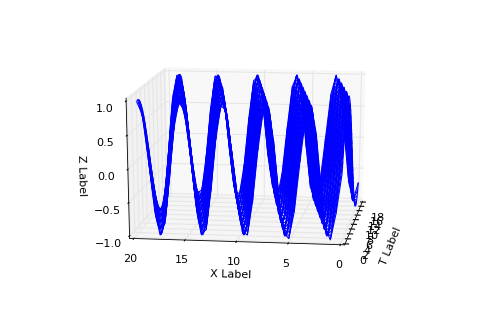

In [97]:
%matplotlib notebook
T = 18
L = 20
t = 0.5
h = 0.5

b = init_base(T, L, t, h)
fill_base(b, T, L, t, h)

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ts = np.arange(0, T, t)
x = np.arange(0, L, h)
TS, X = np.meshgrid(ts, x)
zs = np.array(b)
Z = zs.reshape(TS.shape)

ax.plot_wireframe(TS, X, Z)

ax.set_xlabel('T Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Z Label')

plt.show()


Функция подсчёта погрешности.

In [91]:
def get_error(b1, b2):
    error = 0
    for i in range(len(b1)-1):
        for j in range(len(b1[i])-1):
            error = max(error, abs(b1[i][j]-b2[i*2][j*2])) 
    print error
    return error

Расчёт до заданной погрешности. Число Куранта равно 1.

2.22044604925e-16


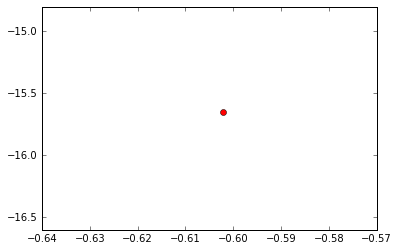

In [92]:
%matplotlib inline
t = 0.5
h = 0.5
b1 = init_base(T, L, t, h)
fill_base(b1, T, L, t, h)

eps = 0.001

errors = []
taus = []

while True:
    h = h/2
    t = t/2
    b2 = init_base(T, L, t, h)
    fill_base(b2, T, L, t, h)
    error = get_error(b1,b2)
    
    errors.append(error)
    taus.append(t)
    
    if error < eps:
        break
    b1 = b2

line = plt.plot(list(map(np.log10, taus)), list(map(np.log10, errors)), "ro")

plt.show()
#print np.polyfit(list(map(np.log10, taus)), list(map(np.log10, errors)), 1)


Расчёт до заданной погрешности. Число Куранта равно 0.6 .

0.0850204193736
0.0218876051739
0.00553096819742
0.00138925063847
0.000348080544812
8.71134874999e-05


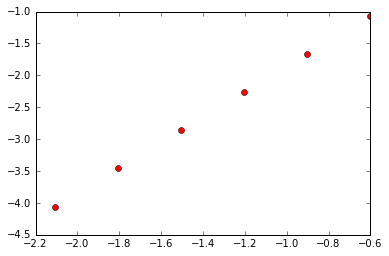

1.98772457959


In [100]:
%matplotlib inline
t = 0.3
h = 0.5
b1 = init_base(T, L, t, h)
fill_base(b1, T, L, t, h)

eps = 0.0001

errors = []
taus = []

while True:
    h = h/2
    t = t/2
    b2 = init_base(T, L, t, h)
    fill_base(b2, T, L, t, h)
    error = get_error(b1,b2)
    
    errors.append(error)
    taus.append(t)
    
    if error < eps:
        break
    b1 = b2

line = plt.plot(list(map(np.log10, taus)), list(map(np.log10, errors)), "ro")

plt.show()
print np.polyfit(list(map(np.log10, taus)), list(map(np.log10, errors)), 1)[0]

Расчёт до заданной погрешности. Число Куранта равно 0.3 .

0.12300140047
0.0314025771408
0.00789867564714
0.0019795552173
0.000495448745575
0.00012392938655
3.09905807366e-05


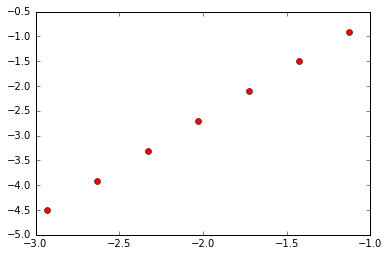

1.99388988241


In [102]:
%matplotlib inline
t = 0.15
h = 0.5
b1 = init_base(T, L, t, h)
fill_base(b1, T, L, t, h)

eps = 0.0001

errors = []
taus = []

while True:
    h = h/2
    t = t/2
    b2 = init_base(T, L, t, h)
    fill_base(b2, T, L, t, h)
    error = get_error(b1,b2)
    
    errors.append(error)
    taus.append(t)
    
    if error < eps:
        break
    b1 = b2

line = plt.plot(list(map(np.log10, taus)), list(map(np.log10, errors)), "ro")

plt.show()
print np.polyfit(list(map(np.log10, taus)), list(map(np.log10, errors)), 1)[0]
